##  Prediting the Indian Liver Patient Records using machine learning
We are going to take the following approach.
## Context
Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.


* Problem Definition.
* Data.
* Evaluation.
* Features.
* Modeling.
* Experiments.


## Problem Definition
In a statement ,Given clinical parameters about a patient can we predict whether or not they having heart disease

## Data
The data came from the Kaggle Respository https://www.kaggle.com/uciml/indian-liver-patient-records

## Evalution
If we can predict the perfect accuracy at preditiong whether or not a patient has heart disease or not during the proof of concept ,we'll purser the project.

## Features
This is where you'll get different information about each of the feature in data.
This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

Columns:

* Age of the patient
* Gender of the patient:Male and Female
* Total Bilirubin:0.1 to 1.2mg /d (1.71 to 20.5 umol/L)
* Direct Bilirubin: If it increase it cause the disease 0.3 and 1.2 miligram(md/dl) and above 1.2mg/dl it content high value of bilirubin.
* Alkaline Phosphotase:Normal 44 to 147 (IV/l) 0.73 to 2.45(ukat/l) high contain the liver damage.
* Alamine Aminotransferase:(35-40 iv/L) 29 to 33 unit per liter for male,19 to 25 iv/L for female. 
* Aspartate Aminotransferase:Male : 6 to 34iv/L and Female: 8-40iv/L
* Total Protiens: 6-8.3grams per decilitier(g/dl)
* Albumin: 3.4 to 5.4g/dl,39 to 51(g/L)
* Albumin and Globulin Ratio: 23 to 35(g/L)
* Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

# Modeling 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("liver.csv")
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [4]:
#let see the counts of the patients how much is suffering form the liver disease 1= having liver disease 0= not having liver disease
data['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [5]:
# let see who suffer more for liver disease Male=1 or Female=0.
pd.crosstab(data.Dataset,data.Gender)

Gender,Female,Male
Dataset,,
1,92,324
2,50,117


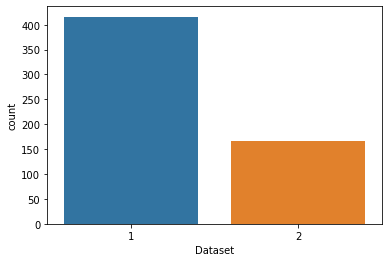

In [6]:
sns.countplot(data=data, x = 'Dataset', label='Count');

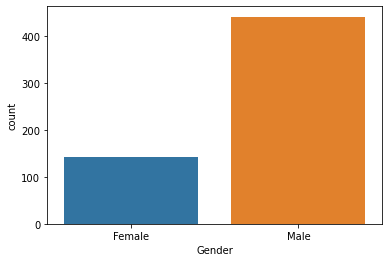

In [7]:
sns.countplot(data=data, x = 'Gender', label='Count')

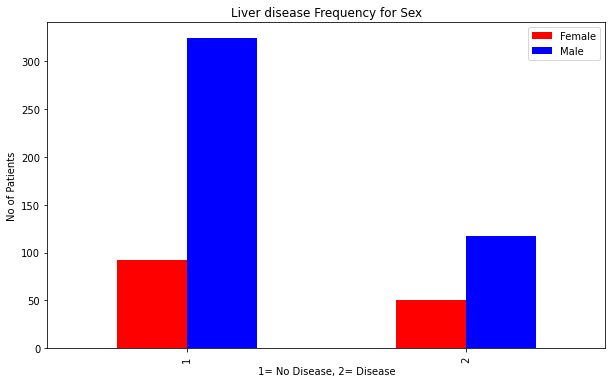

In [8]:
# visluation to understanding in more proper manner.

pd.crosstab(data.Dataset,data.Gender).plot(kind='bar',
                                      figsize=(10,6),
                                      color=('red','blue'));
plt.title("Liver disease Frequency for Sex")
plt.xlabel("1= No Disease, 2= Disease")
plt.ylabel("No of Patients")
plt.legend(["Female","Male"]);

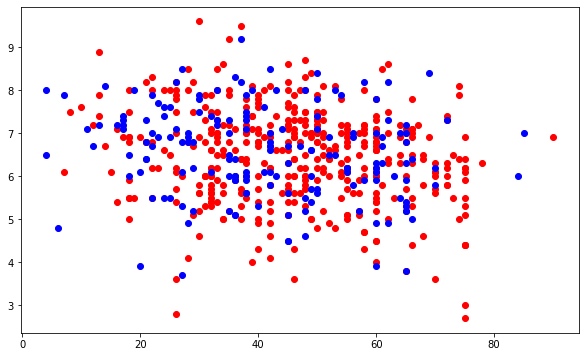

In [9]:
#Creating the plot between Total_Protein and Age 
plt.figure(figsize = (10,6))

#Scatter the positive plot
plt.scatter(data.Age[data.Dataset==1],
           data.Total_Protiens[data.Dataset==1],
           c='red');
#Scatter the negative plot
plt.scatter(data.Age[data.Dataset==2],
           data.Total_Protiens[data.Dataset==2],
           c='blue');

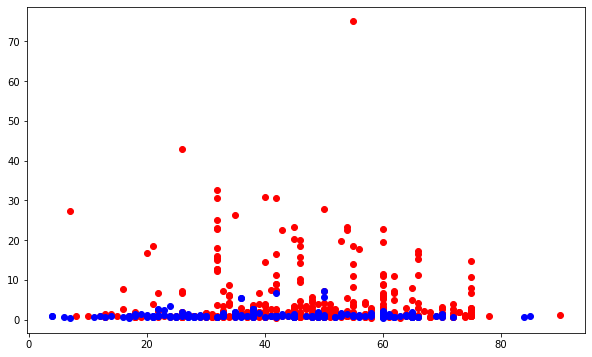

In [10]:
#Creating the plot between Total_Bilirubin and Age 
plt.figure(figsize = (10,6))

#Scatter the positive plot
plt.scatter(data.Age[data.Dataset==1],
           data.Total_Bilirubin[data.Dataset==1],
           c='red');
#Scatter the negative plot
plt.scatter(data.Age[data.Dataset==2],
           data.Total_Bilirubin[data.Dataset==2],
           c='blue');

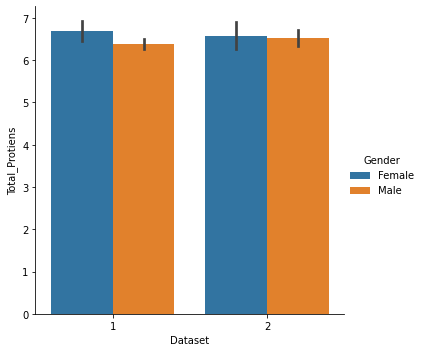

In [11]:
sns.catplot(data=data,x="Dataset",y="Total_Protiens",hue='Gender',kind='bar');

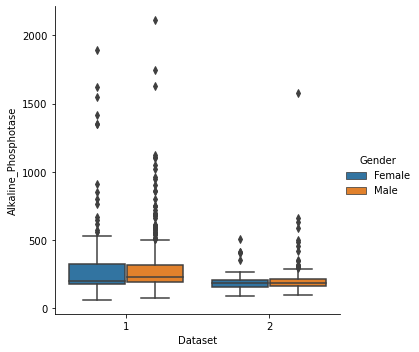

In [12]:
sns.catplot(data=data,x="Dataset",y="Alkaline_Phosphotase",hue='Gender',kind='box');

In [19]:
#let see is there any close relation between indepen features
corr=data.corr()

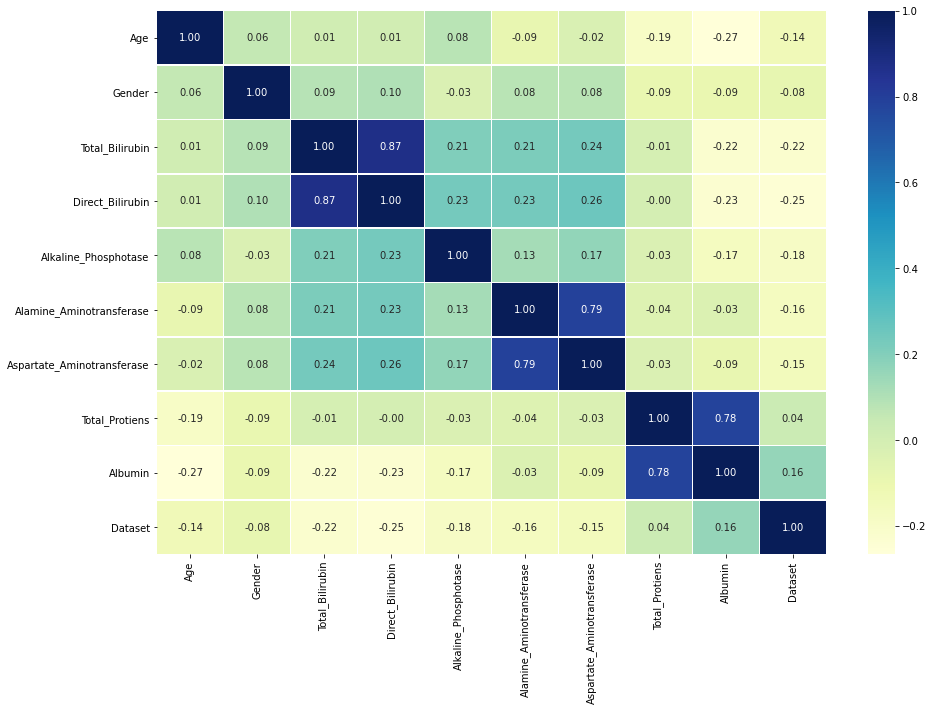

In [20]:
# Make in understand ways by creating heatmap
fig,ax=plt.subplots(figsize=(15,10))

ax = sns.heatmap(corr,
               annot=True,
               linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu")

In [13]:
#data clearning the catogerical data 
#Catgorical data  
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  
labelencoder_x= LabelEncoder()  
data["Gender"]= labelencoder_x.fit_transform(data["Gender"].astype('str'))

In [14]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [17]:
data.drop('Albumin_and_Globulin_Ratio',axis='columns', inplace=True)

In [18]:
data.fillna(data.mean())

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,1
...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1


In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
y

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
str_x=StandardScaler()
x_train=str_x.fit_transform(x_train)
x_test=str_x.fit_transform(x_test)


In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test) 

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix ,accuracy_score 
cm= confusion_matrix(y_test, y_pred)  
cm

In [ ]:
classifier.score(x_train,y_train)

In [ ]:
classifier.score(x_test,y_test)

# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier  
classifier1= RandomForestClassifier()  
classifier1.fit(x_train, y_train) 

In [ ]:
#Predicting the test set result  
y_pred1= classifier1.predict(x_test) 

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix ,accuracy_score 
cm1= confusion_matrix(y_test, y_pred)  
cm1

In [ ]:
classifier1.score(x_test,y_test)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : np.arange(2,20,1),
    'min_samples_leaf' : np.arange(1,10,1),
    'min_samples_split': np.arange(2,10,1),
}

In [ ]:
grid_search = RandomizedSearchCV(RandomForestClassifier(),
                                 estimator=classifier1,
                                 param_distributions=grid_param,
                                 cv=5,
                                 verbose = 3)

In [ ]:
grid_search.fit(x_train,y_train)

In [ ]:
grid_search.best_params_

In [ ]:
classifier2 = RandomForestClassifier(n_estimators = 90,
                                    min_samples_split = 3,
                                    min_samples_leaf = 1,
                                    max_depth = 11,
                                    criterion = 'gini')  
classifier2.fit(x_train, y_train)

In [ ]:
classifier2.score(x_train,y_train)

In [ ]:
classifier2.score(x_test,y_test)

## KNN (K- nearest neighborsClassifier)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
knn.score(x_train,y_train)

In [ ]:
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

In [ ]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13],
               
              }

In [ ]:
searchgrid = RandomizedSearchCV(knn, param_grid,verbose=3)

In [ ]:
searchgrid.fit(x_train,y_train)

In [ ]:
searchgrid.best_params_

In [ ]:
knn_1=KNeighborsClassifier(n_neighbors= 12,
                         leaf_size= 18, 
                         algorithm= 'kd_tree',
                       )
knn_1.fit(x_train,y_train)

In [ ]:
knn_1.score(x_train,y_train)

In [ ]:
knn_1.score(x_test,y_test)